### **Q 6.1)Demostrate an application of Naive Bayes Algorithm**

In [114]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [115]:
f=pd.read_csv("./Datasets/toy_data.csv")
new_cols=pd.get_dummies(f["Type"])*1
f=f.drop(["Type"],axis=1)
f=pd.concat([new_cols,f],axis=1)
minmax=MinMaxScaler()
f[["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]]=minmax.fit_transform(f[["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]])
f=f.drop(["UDI","Product ID"],axis=1)
res=f["Failure Type"]
f=f.drop(["Failure Type"],axis=1)

In [116]:
from imblearn.over_sampling import SMOTE


In [124]:
smote=SMOTE()

x_train,x_test,y_train,y_test=train_test_split(f,res,test_size=0.2)
x_train,y_train=smote.fit_resample(x_train,y_train)
x_test,y_test=smote.fit_resample(x_test,y_test)

In [ ]:
md=GaussianNB()
pred=md.fit(x_train,y_train)

In [ ]:
result=pred.predict(x_test)

0.7884914463452566


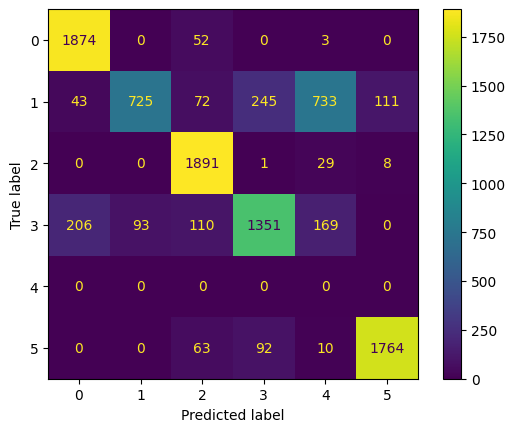

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,result))
confusion_matrix = confusion_matrix(y_test, result)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
